<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```


> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).  python  

##### IMPORTANTE: al ejecutar la celda siguiente se descargaran todos los paquetes necesarios

In [133]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rowsd = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rowsd, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
df_test_text = df_test.Text

labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pacomauret/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/pacomauret/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/pacomauret/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

In [134]:
#datos del grupo de entrenamiento
print(df_train_text.shape)
unique, counts = np.unique(labels_train, return_counts=True)
print(dict(zip(unique, counts)))

#datos del grupo de testeo
print(df_test_text.shape)
uniquet, countst = np.unique(labels_test, return_counts=True)
print(dict(zip(uniquet, countst)))

(3554,)
{0.0: 1784, 1.0: 1770}
(3554,)
{0.0: 1803, 1.0: 1751}


Cada dataset contiene 3554 ejemplos.
En el dataset de entrenamiento hay 1784 ejemplos negativos y 1770 ejemplos positivos y en el dataset de prueba hay 1803 ejemplos negativos y 1751 ejemplos positivos

> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [135]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size=0.3, random_state=0)


> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

In [136]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words


texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

La importancia del pre-procesamiento del texto es obtener un input lo mas limpio posible, dejando las palabras que mas probablemente serviran, aumentando asi las palabras en comun entre los distintos inputs, para realizar asi una mejor comparación

> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [137]:
#Aqui lo estoy haciendo con el conjunto de entrenamiento
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
#train
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
#val
features_val = vectorizer.transform(texts_val)
#test
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names() #con esto obtengo las palabras comunes entre los inputs
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,)) # con esto obtengo cuantas veces aparecen dichas palabras en el de entrenamiento
distest=list(np.array(features_test.sum(axis=0)).reshape(-1,))


arr = []
arr_test = []
print("Palabras que mas se repiten en el conjunto de entrenamiento\n")
for counter in range(len(dist)):
    arr.append([dist[counter],vocab[counter]])
arr.sort(key=lambda x: x[0],reverse=True)
print(arr[:10])

print("\nPalabras que mas se repiten en el conjunto de prueba\n")
for counterr in range(len(distest)):
    arr_test.append([distest[counterr],vocab[counterr]])
arr_test.sort(key=lambda x: x[0],reverse=True)
print(arr_test[:10])

Palabras que mas se repiten en el conjunto de entrenamiento

[[423, 'film'], [349, 'movie'], [182, 'one'], [166, 'like'], [164, 'ha'], [141, 'make'], [128, 'story'], [120, 'character'], [105, 'good'], [104, 'even']]

Palabras que mas se repiten en el conjunto de prueba

[[581, 'film'], [568, 'movie'], [259, 'one'], [246, 'ha'], [239, 'like'], [204, 'story'], [178, 'character'], [176, 'time'], [167, 'make'], [142, 'good']]


> e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

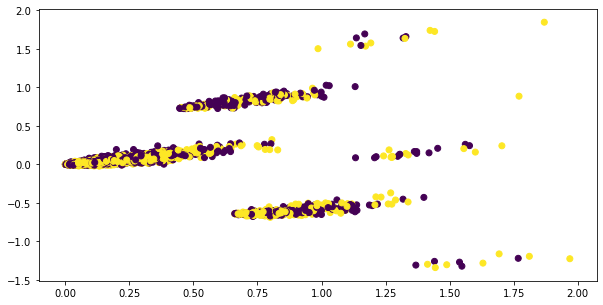

In [138]:
#Aqui voy 26-12-2019
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

Según lo que se puede apreciar por el gráfico anterior, se observan 6 grandes grupos de semántica, los cuales a medida que se alejan por el eje x, disminuye la cantidad de datos, además se puede observar que cada uno de estos grupos tiene una cantidad similar de opiniones negativas y positivas.

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.

Param C =  0.0001
Param C =  0.001
Param C =  0.01
Param C =  0.1
Param C =  1.0
Param C =  10.0
Param C =  100.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Param C =  1000.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Esta es la maxima accuracy  0.703842549203374


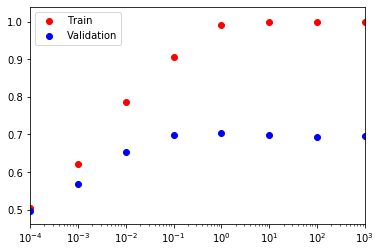

In [139]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C = ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    tester_acc = model.score(xv,yv)
    return model, train_acc, tester_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
lista_train = []
lista_tester= [] #conjunto valdacion
for cs in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= cs)
    lista_train.append(train_acc)
    lista_tester.append(test_acc)
    
 
    
print ("Esta es la maxima accuracy ",max(lista_tester))
plt.scatter(Cs,lista_train, c='r', label='Train')
plt.scatter(Cs,lista_tester, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**3])
plt.show()

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

Se usaran rbf y linear, debido a que el primero es el que se utiliza por defecto y linear es el mas comunmente utilizado en la categorización de texto

Param C=  0.0001 Kernel=  linear
Param C=  0.001 Kernel=  linear
Param C=  0.01 Kernel=  linear
Param C=  0.1 Kernel=  linear
Param C=  1.0 Kernel=  linear
Param C=  10.0 Kernel=  linear
Param C=  100.0 Kernel=  linear
Param C=  1000.0 Kernel=  linear


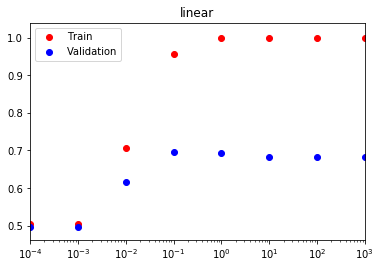

Param C=  0.0001 Kernel=  rbf
Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  rbf
Param C=  1.0 Kernel=  rbf
Param C=  10.0 Kernel=  rbf
Param C=  100.0 Kernel=  rbf
Param C=  1000.0 Kernel=  rbf


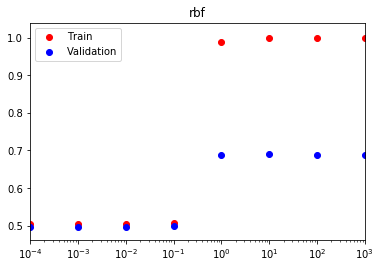

In [140]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, C, kernel='linear'):
    print("Param C= ", C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]

lista_train = []
lista_tester= [] #conjunto valdacion
for cs in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, cs, 'linear')
    lista_train.append(train_acc)
    lista_tester.append(test_acc)

    
plt.title("linear")
plt.scatter(Cs,lista_train, c='r', label='Train')
plt.scatter(Cs,lista_tester, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**3])
plt.show()

lista_trainrbf = []
lista_testerrbf= [] #conjunto valdacion
for cs in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, cs, 'rbf')
    lista_trainrbf.append(train_acc)
    lista_testerrbf.append(test_acc)

plt.title("rbf")
plt.scatter(Cs,lista_trainrbf, c='r', label='Train')
plt.scatter(Cs,lista_testerrbf, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**3])
plt.show()

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

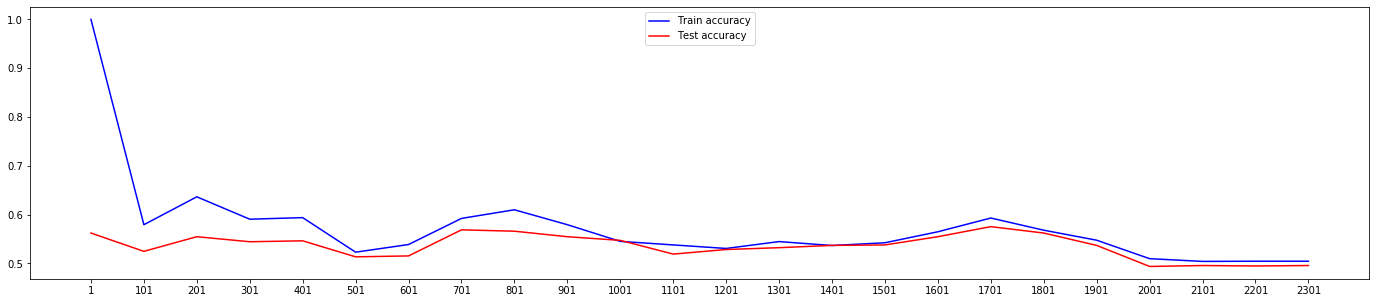

Mejor accuracy total 0.5754451733833177


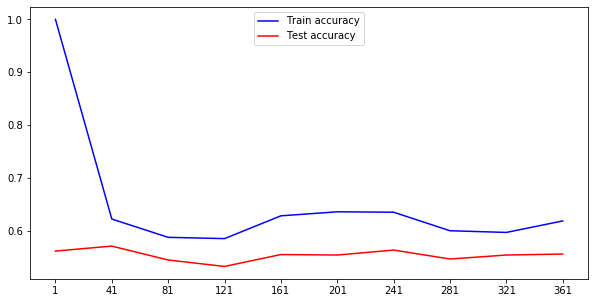

Mejor accuracy rango 1-400 0.5716963448922212


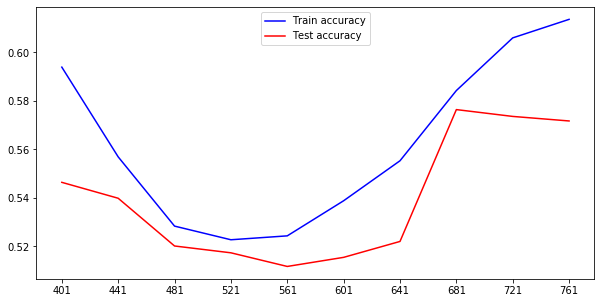

Mejor accuracy rango 400-800 0.5763823805060918
Mejor accuracy rango 1600-2000 0.5895032802249297


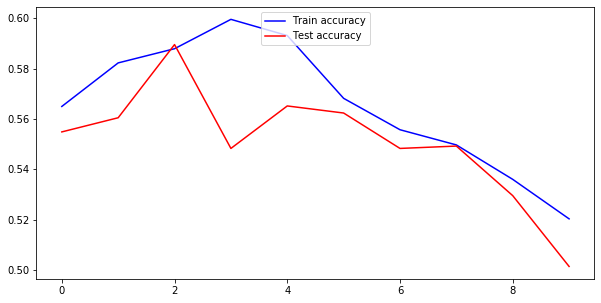

In [141]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #rint("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

arr_train_acc = []
arr_test_acc = []
etiqueta = []

#print(features_train.shape[0])
#features_train tiene 2800 datos aprox
for i in range(1,2401,100):
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = i)
    arr_train_acc.append(train_acc)
    arr_test_acc.append(test_acc)
    etiqueta.append(i)
    
mejortestKnn= max(arr_test_acc)
plt.figure(figsize=(24,5))
xi = list(range(len(arr_test_acc)))
plt.plot(xi, arr_train_acc, linestyle='-', color='b', label='Train accuracy')
plt.plot(xi, arr_test_acc, linestyle='-', color='r', label='Test accuracy')
plt.legend(loc='upper center')
plt.xticks(xi, etiqueta)
plt.show()
print("Mejor accuracy total", mejortestKnn)

#Detalle entre 1-400
arr_train_acc = []
arr_test_acc = []
etiqueta = []

for i in range(1,401,40):
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = i)
    arr_train_acc.append(train_acc)
    arr_test_acc.append(test_acc)
    etiqueta.append(i)    

mejortestKnn= max(arr_test_acc)
plt.figure(figsize=(10,5))
xi = list(range(len(arr_test_acc)))
plt.plot(xi, arr_train_acc, linestyle='-', color='b', label='Train accuracy')
plt.plot(xi, arr_test_acc, linestyle='-', color='r', label='Test accuracy')
plt.legend(loc='upper center')
plt.xticks(xi, etiqueta)
plt.show()
print("Mejor accuracy rango 1-400", mejortestKnn)


#Detalle entre 400 - 800
arr_train_acc = []
arr_test_acc = []
etiqueta = []

for i in range(401,801,40):
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = i)
    arr_train_acc.append(train_acc)
    arr_test_acc.append(test_acc)
    etiqueta.append(i)    

mejortestKnn= max(arr_test_acc)
plt.figure(figsize=(10,5))
xi = list(range(len(arr_test_acc)))
plt.plot(xi, arr_train_acc, linestyle='-', color='b', label='Train accuracy')
plt.plot(xi, arr_test_acc, linestyle='-', color='r', label='Test accuracy')
plt.legend(loc='upper center')
plt.xticks(xi, etiqueta)
plt.show()
print("Mejor accuracy rango 400-800", mejortestKnn)

#Detalle entre 1600 - 2000
arr_train_acc = []
arr_test_acc = []
etiqueta = []

for i in range(1601,2001,40):
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = i)
    arr_train_acc.append(train_acc)
    arr_test_acc.append(test_acc)
    etiqueta.append(i)    

mejortestKnn= max(arr_test_acc)
plt.figure(figsize=(10,5))
xi = list(range(len(arr_test_acc)))
plt.plot(xi, arr_train_acc, linestyle='-', color='b', label='Train accuracy')
plt.plot(xi, arr_test_acc, linestyle='-', color='r', label='Test accuracy')
plt.legend(loc='upper center')
print("Mejor accuracy rango 1600-2000", mejortestKnn)

Primero mencionar que el test se realizo en un intervalo de 2400 datos que es aproximadamente el largo de nuestro conjunto, obteniendose el primero gráfico, en el cual se pueden observar 3 puntos donde posiblemente se encuentre la maxima accuracy, los que se procedieron a graficar mas detalladamente, obteniendose asi 3 gráficos, de los cuales, el gráfico en el rango entre 1601 y 1961 tiene el valor con mayor accuracy, el cual es aproximadamente 1660 vecinos

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.

la mejor accuracy es  0.5182755388940956


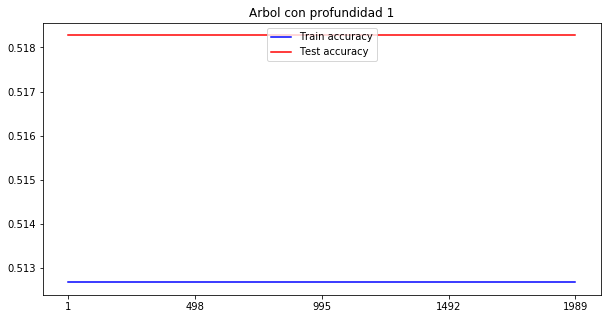

la mejor accuracy es  0.6016869728209935


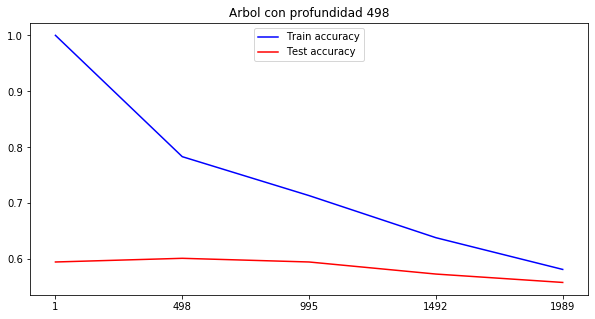

la mejor accuracy es  0.6101218369259607


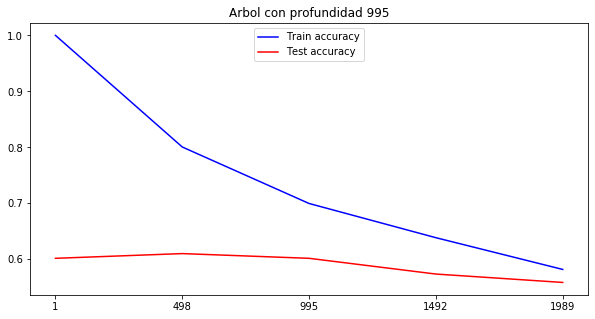

la mejor accuracy es  0.619493908153702


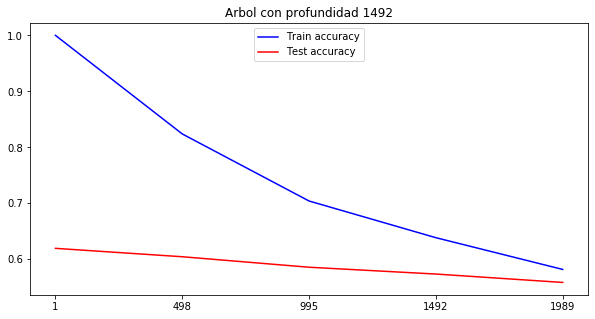

la mejor accuracy es  0.612933458294283


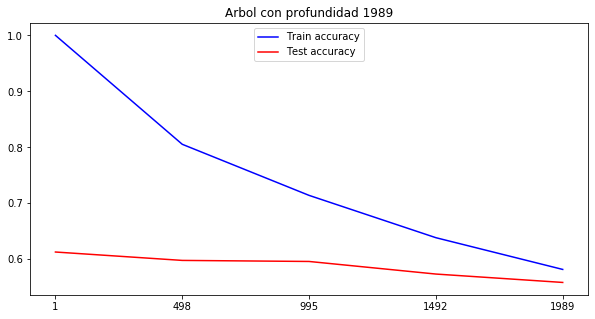

la mejor accuracy es  0.6176194939081537


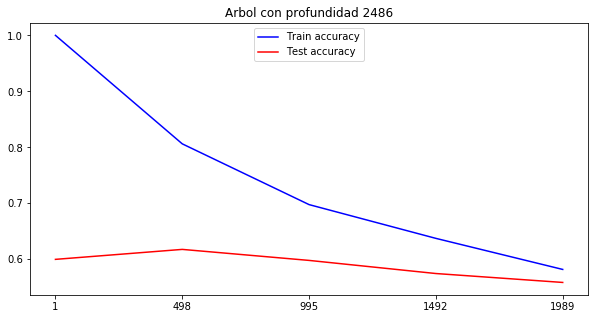

la mejor accuracy es  0.6185567010309279


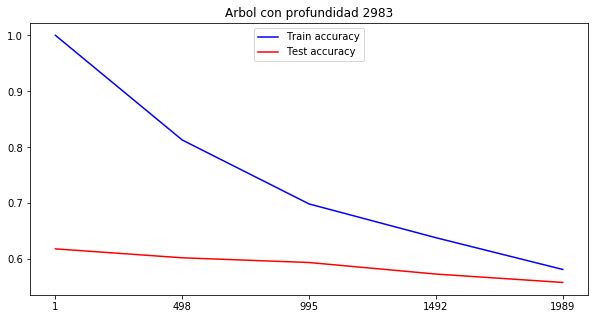

la mejor accuracy es  0.6157450796626054


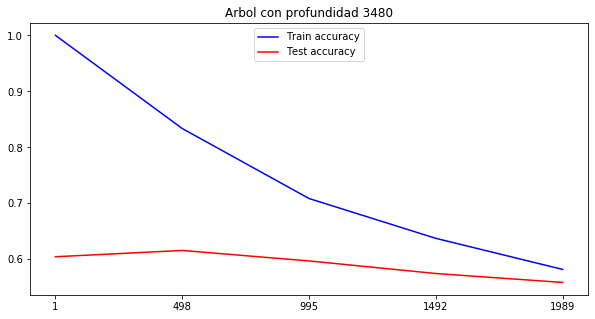

la mejor accuracy es  0.6119962511715089


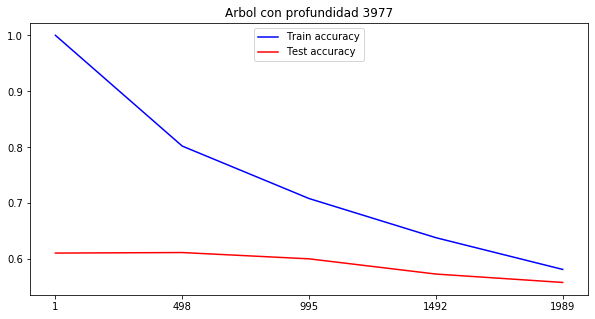

la mejor accuracy es  0.6082474226804123


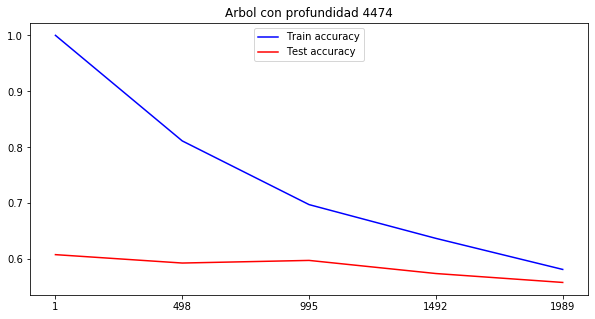

la mejor accuracy es  0.6185567010309279


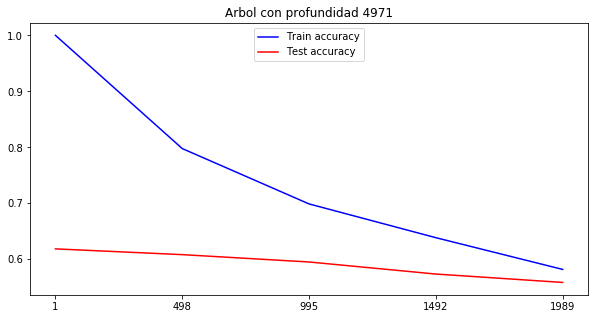

la mejor accuracy es  0.6288659793814433


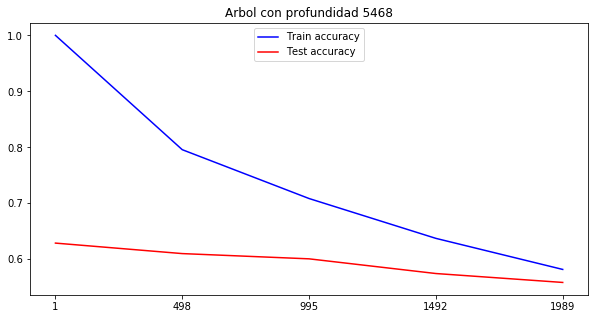

la mejor accuracy es  0.612933458294283


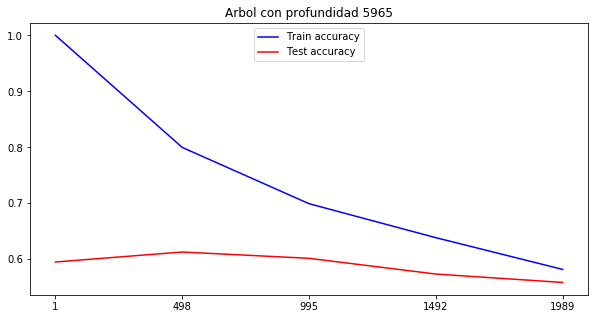

la mejor accuracy es  0.6026241799437676


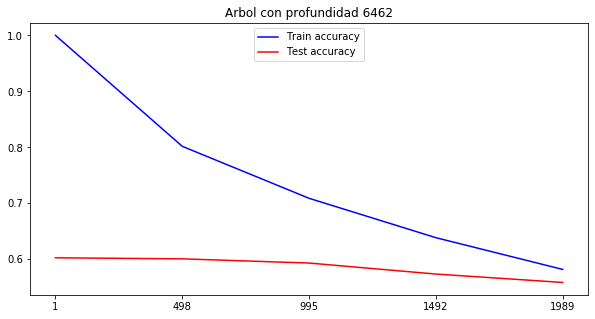

la mejor accuracy es  0.6110590440487348


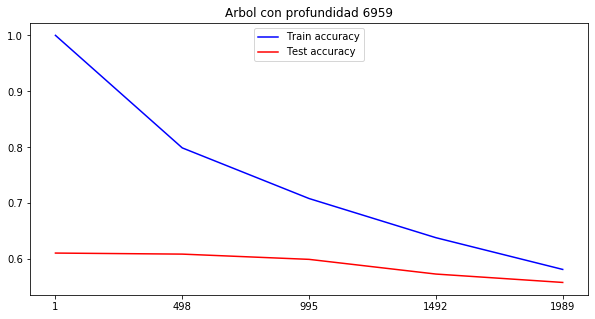

la mejor accuracy es  0.619493908153702


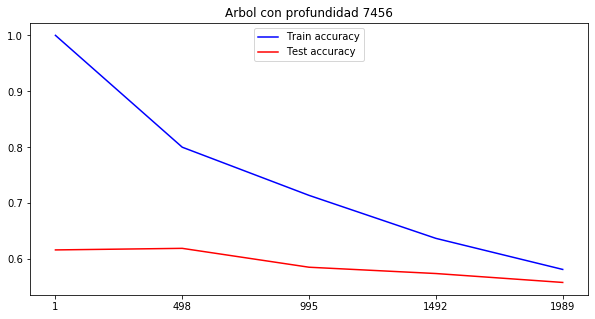

la mejor accuracy es  0.60543580131209


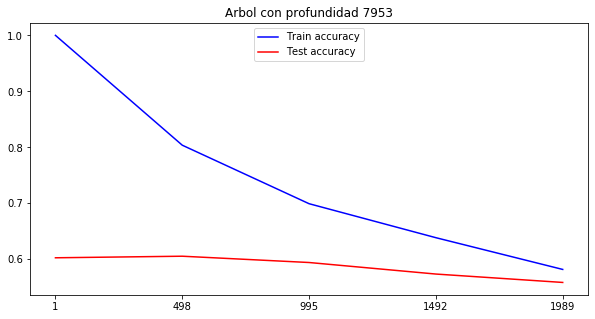

In [100]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc


steps=int(features_train.shape[1]/16)

Depths = np.arange(1, features_train.shape[1], steps ) #choose steps
Sampless = np.arange(2, features_train.shape[0] , steps ) #choose steps
for i in Depths:
    lista_train = []
    lista_tester= [] 
    for j in Sampless:
        model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d=i, param_m=int(j))
        lista_train.append(train_acc)
        lista_tester.append(test_acc)

    
    
    
   
    mejortestKnn= max(lista_tester)
    plt.figure(figsize=(10,5))
    xi = list(range(len(lista_tester)))
    plt.plot(xi, lista_train, linestyle='-', color='b', label='Train accuracy')
    plt.plot(xi, lista_tester, linestyle='-', color='r', label='Test accuracy')
    plt.title("Arbol con profundidad "+str(i))
    print ("la mejor accuracy es ",max(lista_tester))
    plt.legend(loc='upper center')
    plt.xticks(xi, Depths)
    plt.show()
    
    
    

    

Se puede ver que al modificar los valores para la profundidad y sampless la curva tomada por las accuracy tiende a volverse mas suave, y tomando en cuenta la curva de la accuracy se puede ver con mejor detalle los puntos donde esta empieza a decaer o toma puntos de mayor precision.

> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

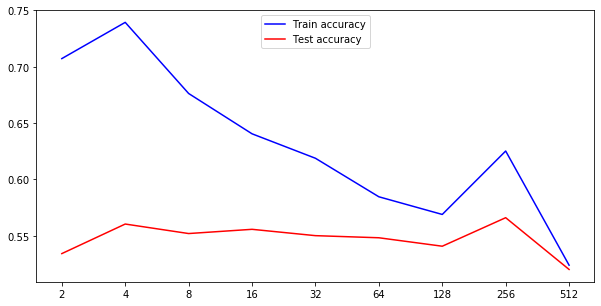

Mejor accuracy 0.5660731021555764


In [101]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc

N_h = [2**i for i in range(1,10)]

arr_train_acc = []
arr_test_acc = []
etiqueta = []

for i in N_h:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = i)
    arr_train_acc.append(train_acc)
    arr_test_acc.append(test_acc)
    etiqueta.append(i)

bestANN = max(arr_test_acc)

plt.figure(figsize=(10,5))
x = list(range(len(arr_test_acc)))
plt.plot(x, arr_train_acc, linestyle='-', color='b', label='Train accuracy')
plt.plot(x, arr_test_acc, linestyle='-', color='r', label='Test accuracy')
plt.legend(loc='upper center')
plt.xticks(x, etiqueta)
plt.show()
print("Mejor accuracy", bestANN)


Podemos observar que el valor donde se encuentra la mayor accuracy en el conjunto de testing es en 256

> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

In [102]:
model, train_acc, val_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, 1)
print("Accuracy Training:", train_acc)
print("Accuracy Validacion:", val_acc)

Param C =  1
Accuracy Training: 0.9919581825492562
Accuracy Validacion: 0.703842549203374


El modelo que entrega una mayor precición es el de regresión logistica cuando el parametro C es igual a 1, en comparación con la accuracy obtenida en otros modelos podemos ver que, tomando en cuenta Knn y Ann es bastante mejor ya que es aproximadamente 10% más precisa, mientras que al comparar con SVM es mejor por poco

> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [103]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

Se puede ver que el modelo no necesita ser entrenado para conseguir buenas respuestas, ya que consigió mejor accuracy que otros modelos que requerian pre-procesamiento, lo que hace este modelo mas rapido, algo valioso cuando se trata con una cantidad de datos muy grande.

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [104]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)





In [105]:
#print(word_scores[0])
#print(max(word_scores[0]))
sup_neg=""
sup_pos=""
neg=0
pos=0
cont=0
for i,j in word_scores:
    if(i > neg):
        neg = i
        sup_neg = vocab[cont]
    if(j > pos):
        pos = j
        sup_pos = vocab[cont]
    cont=cont+1

print ("palabra mas negativa ",sup_neg)
print ("palabra mas positiva ",sup_pos)
    

palabra mas negativa  cliche
palabra mas positiva  world


Se puede ver que la palabra world como la mas positiva debido a que esta significa mundo, que usa para comparar con peliculas de todo el mundo. y por el otro lado esta la palabra cliche como la mas negativa lo que se debe a lo regular de las peliculas o lo esperado de estas.

> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.

In [106]:
from nltk.stem.porter import PorterStemmer
word=vocab[110]



def word_stem(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)


def word_extractor_v2(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ word_stem(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words


#print(word_extractor_v2("I love to eat cake"))

texts_train_p = [word_extractor_v2(text) for text in df_train_text]
texts_val_p = [word_extractor_v2(text) for text in df_val_text]
texts_test_p = [word_extractor_v2(text) for text in df_test_text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) 

vectorizer.fit(texts_train_p) 
features_train_p = vectorizer.transform(texts_train_p) 
features_val_p = vectorizer.transform(texts_val_p)
features_test_p = vectorizer.transform(texts_test_p)


model_p, train_acc, val_acc = do_LOGIT(features_train_p,labels_train,features_val_p,labels_val, param = 1)
print("Precision Test: ", model_p.score(features_test_p, labels_test))

Param C =  1
Precision Test:  0.7191896454698931


> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train_p)
features_train_p=tfidf_model.transform(texts_train_p)
features_val_p=tfidf_model.transform(texts_val_p)
features_test_p=tfidf_model.transform(texts_test_p)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))




Param C =  0.0001
Param C =  0.001
Param C =  0.01
Param C =  0.1
Param C =  1.0
Param C =  10.0
Param C =  100.0
Param C =  1000.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Esta es la maxima accuracy  0.7122774133083412


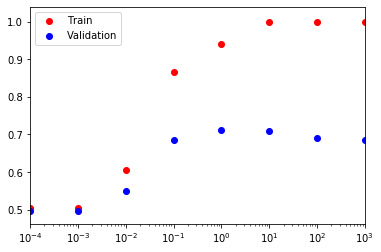

In [121]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C = ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    tester_acc = model.score(xv,yv)
    return model, train_acc, tester_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
lista_train = []
lista_tester= [] #conjunto valdacion
for cs in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train_p,labels_train,features_val_p,labels_val, param= cs)
    lista_train.append(train_acc)
    lista_tester.append(test_acc)
    
 
    
print ("Esta es la maxima accuracy ",max(lista_tester))
plt.scatter(Cs,lista_train, c='r', label='Train')
plt.scatter(Cs,lista_tester, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**3])
plt.show()

Se puede ver que se mejora la calidad en 1,2% casi, lo cual es significativo debido a la comparacion con los otros modelos.

Param C=  0.0001 Kernel=  rbf
Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  rbf
Param C=  1.0 Kernel=  rbf
Param C=  10.0 Kernel=  rbf
Param C=  100.0 Kernel=  rbf
Param C=  1000.0 Kernel=  rbf


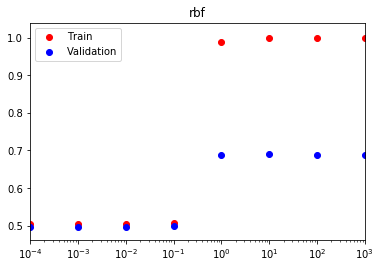

el valor maximo de accuracy es  0.689784442361762


In [109]:
lista_trainrbf = []
lista_testerrbf= [] #conjunto valdacion
for cs in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, cs, 'rbf')
    lista_trainrbf.append(train_acc)
    lista_testerrbf.append(test_acc)

plt.title("rbf")
plt.scatter(Cs,lista_trainrbf, c='r', label='Train')
plt.scatter(Cs,lista_testerrbf, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**3])
plt.show()
print ("el valor maximo de accuracy es ", max(lista_testerrbf))

Se puede ver que se baja la calidad en casi 4% , lo cual es significativo debido a la comparacion con los otros modelos. 

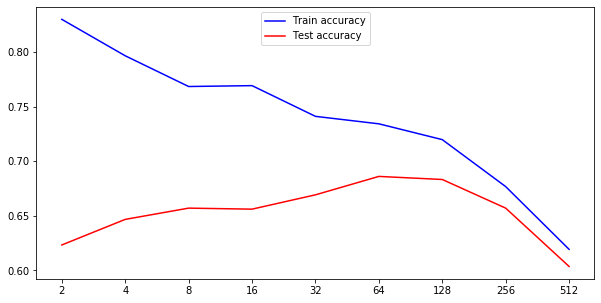

Mejor accuracy 0.6860356138706654


In [110]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc

N_h = [2**i for i in range(1,10)]

arr_train_acc = []
arr_test_acc = []
etiqueta = []

for i in N_h:
    model, train_acc, test_acc = do_KNN(features_train_p,labels_train,features_val_p,labels_val, param = i)
    arr_train_acc.append(train_acc)
    arr_test_acc.append(test_acc)
    etiqueta.append(i)

bestANN = max(arr_test_acc)

plt.figure(figsize=(10,5))
x = list(range(len(arr_test_acc)))
plt.plot(x, arr_train_acc, linestyle='-', color='b', label='Train accuracy')
plt.plot(x, arr_test_acc, linestyle='-', color='r', label='Test accuracy')
plt.legend(loc='upper center')
plt.xticks(x, etiqueta)
plt.show()
print("Mejor accuracy", bestANN)

Se puede ver que se mejora la calidad en casi 10%, lo cual es significativo debido a la comparacion con los otros modelos.

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [117]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test_p, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.57      0.80      0.66      1803
           +       0.64      0.38      0.48      1751

    accuracy                           0.59      3554
   macro avg       0.61      0.59      0.57      3554
weighted avg       0.61      0.59      0.57      3554



Se puede ver que el modelo tiende a predecir con mayor precision la clase positiva.


> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [124]:
classes_weights = {0: 1, 1: 5} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.74      0.63      0.68      1803
           +       0.67      0.77      0.71      1751

    accuracy                           0.70      3554
   macro avg       0.70      0.70      0.70      3554
weighted avg       0.70      0.70      0.70      3554



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Al intentar con varios valores para las clases queda claro que esto ayuda al problema trabajado.

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [125]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  1.0 -- Pred sent:  [0.17218071 0.82781929]
Raw text:  [dong] makes a valiant effort to understand everyone's point of view , and he does such a good job of it that family fundamentals gets you riled up .

True sent:  1.0 -- Pred sent:  [0.9960427 0.0039573]
Raw text:  while this gentle and affecting melodrama will have luvvies in raptures , it's far too slight and introspective to appeal to anything wider than a niche audience .

True sent:  1.0 -- Pred sent:  [0.96493088 0.03506912]
Raw text:  one of those movies that catches you up in something bigger than yourself , namely , an archetypal desire to enjoy good trash every now and then .

True sent:  0.0 -- Pred sent:  [0.01392485 0.98607515]
Raw text:  enigma looks great , has solid acting and a neat premise . yet why it fails is a riddle wrapped in a mystery inside an enigma .

True sent:  0.0 -- Pred sent:  [0.63388954 0.36611046]
Raw text:  the 50-something lovebirds are too immature and unappealing to care about .

Tr

Una prediccion continua da mas informacion ya que muestra la probabilidad de que algo esté correcto y puede ser utilizado para arreglar o modificar algunas predicciones al favor de una clase, por ejemplo si se tiene 51% de que no esté contagiado y un 49% de que si, al ser continuo esto puede llevarse a que se escoga la segunda clase por precaucion. Aun que esto dificulte la lectura de los datos, como es el caso de las predicciones categoricas las cuales muestran tajantemente la decicion 1 o 0.

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

Se puede ver una mejora destacable para ANN ya que mejora en un porcentaje bastante mayor que en los demas ejemplos, esto se puede deber a la forma de tratar los datos de ciertos modelos lo que se ve beneficiado por la nueva representacion. Debido a esto mismo es dificil escoger un mejor modelo, ya que todos tienen alguna representacion para la cual funcionan mejor, pero ANN tiene la cualidad para aprender desde sus propios resultados, lo que ayuda al aprendizaje.

<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.
```
wget http://fprodrigues.com//mturk-datasets.tar.gz
```

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona

```python
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 
```

> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La métrica de evaluación será el *accuracy score*
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
```

#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```

In [126]:
import pandas as pd
df = pd.read_csv("./mturk-datasets/sentiment_polarity/mturk_answers.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27746 entries, 0 to 27745
Data columns (total 6 columns):
WorkerId                   27746 non-null object
Input.id                   27746 non-null int64
Input.original_sentence    27746 non-null object
Input.stemmed_sent         27746 non-null object
Input.true_sent            27746 non-null object
Answer.sent                27746 non-null object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


Se puede ver que el data set consiste de 6 columnas las cuales incluyen el ID del trabajador, la id de la pelicula, la frase utilizada y una version abreviada de esta, como tambien el valor sentimental de la oracion, ya sea el dicho por un experto y la opinion personal del trabajador sobre esta.

In [127]:
from sklearn.model_selection import train_test_split    
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lista=[]
label_true=[]
for i in range(27746):  # se guarda en lista las opiniones 1 si es positivo 0 si es negativo
    if (df["Answer.sent"][i] == 'pos'):
        tupla=(1,df["Input.stemmed_sent"][i])
        
    else:
        tupla=(0,df["Input.stemmed_sent"][i])
    if (df["Input.true_sent"][i] == 'pos'):
        label_true.append(1)
    else:
        label_true.append(0)
        
    lista.append(tupla)

df_train = pd.DataFrame(lista, columns = ['Answer','Text'])  
df_train2 = pd.DataFrame(label_true, columns = ['True']) 
Text = df_train.Text
#Tru = df_train2.True
Answer = df_train.Answer.values


In [128]:
label_train,label_val,text_train, text_val, answer_train, answer_val  = train_test_split(label_true,Text, Answer, test_size= 0.30, random_state=0)
list_texts_train = []
list_texts_val = []



for i in text_train:
    list_texts_train.append(i)

for i in text_val:
    list_texts_val.append(i)
    

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer.fit(list_texts_train)
features_train = vectorizer.transform(list_texts_train)
features_val = vectorizer.transform(list_texts_val)

vocab = vectorizer.get_feature_names() #con esto obtengo las palabras comunes entre los inputs
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,)) 

Se crean los conjuntos de testing y de evaluacion, junto con la representacion.

Param C =  0.0001
Param C =  0.001
Param C =  0.01
Param C =  0.1
Param C =  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Param C =  10.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Param C =  100.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Param C =  1000.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


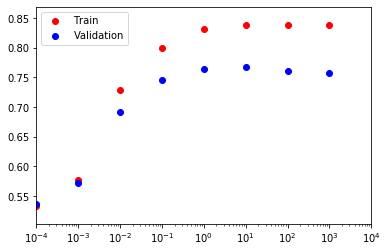

el valor de la mejor accuracy conseguida para regresion logistica fue  0.8388940376892184


In [129]:
def do_LOGIT(x,y,xv,yv, param):
    print("Param C = ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    tester_acc = model.score(xv,yv)
    return model, train_acc, tester_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
lista_train = []
lista_tester= [] #conjunto validacion
for cs in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,answer_train,features_val,answer_val, param= cs)
    lista_train.append(train_acc)
    lista_tester.append(test_acc)


    
    
best_linear_reg = max(lista_train)
plt.scatter(Cs,lista_train, c='r', label='Train')
plt.scatter(Cs,lista_tester, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**4])
plt.show()
print ("el valor de la mejor accuracy conseguida para regresion logistica fue ", best_linear_reg)


In [130]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(features_val)
print(accuracy_score(label_val ,y_pred  ) )


0.8523546371936569


Al ver el grado de accuracy que se consigue al tratar de predecir una respuesta solo con el conocimiento parcial que tiene la gente comparado con el grado de conocimiento de los expertos, se puede ver que se consigue una buena representacion de lo que sería una respuesta de alguien con conocimientos elevados del tema, asi siendo este tipo de modelos util para temas en los cuales es dficil encontrar expertos, y que se necesita una respuesta con gran cantidad de soporte.

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.